<a href="https://colab.research.google.com/github/Sambhaji6529/Linear-Regression_Project/blob/main/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'
plt.style.use('seaborn-whitegrid')

<ipython-input-1-c4311d7181a4>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
df  = pd.read_csv("/content/drive/MyDrive/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


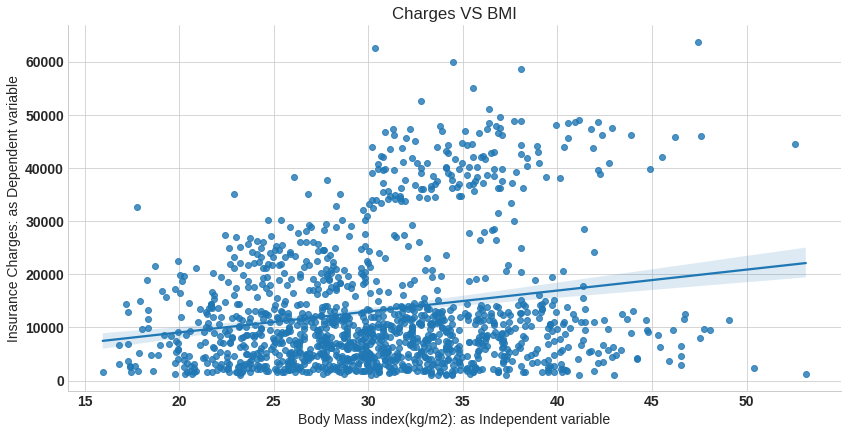

In [ ]:
""" for our visualization purpose will fit line using seaborn library only for bmi as independent variable 
and charges as dependent variable"""

sns.lmplot(x='bmi', y='charges', data=df, aspect=2,height=6)
plt.xlabel('Body Mass index(kg/m2): as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charges VS BMI');

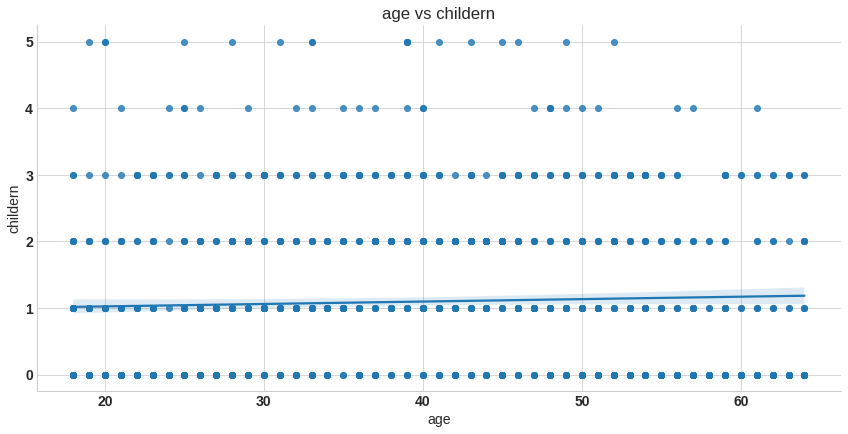

In [ ]:
#age vs childern

sns.lmplot(x='age', y='children', data=df, aspect=2,height=6)
plt.xlabel('age')
plt.ylabel('childern')
plt.title('age vs childern');

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


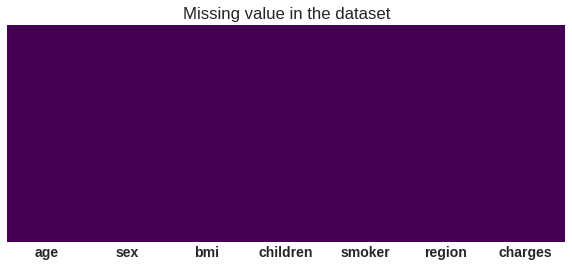

In [ ]:
#check for missing value 
#There is no missing value in the data set
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

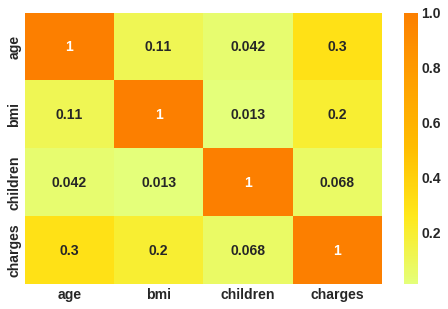

In [ ]:
# correlation plot
#Thier no correlation among valiables.
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('age  ~  bmi+children+charges', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,27.017661,Intercept
1,1.040951,bmi
2,1.004646,children
3,1.045616,charges


In [ ]:
X=df.drop('charges',axis=1)
y=df['charges']
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [ ]:
X_train

,age,sex,bmi,children,smoker,region
1075,32,female,29.59,1,no,southeast
131,61,female,22.04,0,no,northeast
15,19,male,24.60,1,no,southwest
1223,20,female,24.42,0,yes,southeast
1137,26,female,22.23,0,no,northwest
...,...,...,...,...,...,...
763,27,male,26.03,0,no,northeast
835,42,male,35.97,2,no,southeast
1216,40,male,25.08,0,no,southeast
559,19,male,35.53,0,no,northwest


In [ ]:
X_test

,age,sex,bmi,children,smoker,region
578,52,male,30.200,1,no,southwest
610,47,female,29.370,1,no,southeast
569,48,male,40.565,2,yes,northwest
1034,61,male,38.380,0,no,northwest
198,51,female,18.050,0,no,northwest
...,...,...,...,...,...,...
574,57,female,34.295,2,no,northeast
1174,29,male,32.110,2,no,northwest
1327,51,male,30.030,1,no,southeast
817,23,male,37.100,3,no,southwest
